In [1]:
import pandas as pd

## Import data

In [2]:
df = pd.read_csv("data/res_2000.csv", index_col='x')
df.index = pd.to_datetime(df.index)
df.shape

(5221, 287)

Keep at least 1260 days and 100 attributs

In [3]:
df

,FPX1,SHCP,SPXX,SX5P,A.CWI,A.XUS,AUD.,BBG.,BBG.9,BBG.G,...,FDCPX,HSI,GSPTSE,GOLDPMGBD228NLBM,WILL4500IND,WILL4500PR,WILL5000IND,WILL5000INDFC,WILL5000PR,WILL5000PRFC
x,,,,,,,,,,,,,,,,,,,,,
2000-12-29,5926.42,2073.48,359.79,4557.13,100.00,100.00,0.556,930.68,1031.64,1052.19,...,48.034107,15095.53027,8933.700195,274.45,5.44,415.27,39.80,39.80,12175.88,12175.88
2001-01-02,5798.90,2103.47,354.83,4492.27,98.50,99.55,0.559,938.84,1041.97,1062.98,...,43.306885,14869.94043,8611.500000,271.10,5.14,392.67,38.46,38.46,11763.92,11763.92
2001-01-03,5684.05,2123.90,351.38,4456.97,100.52,98.95,0.563,933.62,1035.56,1055.14,...,51.329395,14589.58008,8937.799805,267.15,5.46,416.89,40.48,40.48,12380.26,12380.26
2001-01-04,5815.99,2117.41,356.54,4534.10,100.67,100.32,0.565,938.37,1041.96,1061.03,...,51.109100,15235.03027,8905.700195,267.10,5.36,409.75,39.97,39.97,12224.42,12224.42
2001-01-05,5758.02,2125.30,355.10,4503.22,99.47,100.50,0.571,943.45,1048.96,1067.27,...,47.097843,15447.61035,8690.200195,267.40,5.16,393.93,38.82,38.82,11872.66,11872.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17,6054.82,3445.55,424.91,3282.11,345.32,290.16,0.777,2311.76,3046.35,2673.06,...,117.470001,29034.11914,18983.099610,1729.65,39.22,2239.97,198.70,200.15,41740.28,42154.70
2021-03-18,6062.79,3463.07,426.59,3296.68,342.92,291.90,0.777,2304.57,3038.96,2663.49,...,115.360001,29405.72070,18836.500000,1725.90,38.16,2179.18,195.33,196.45,41031.14,41373.33
2021-03-19,5997.96,3404.66,423.35,3276.68,341.93,289.84,0.777,2305.61,3037.98,2666.42,...,115.580002,28990.93945,18854.000000,1735.20,38.41,2193.44,195.49,196.80,41061.42,41443.13


Data from 2000-12-29 to 2021-03-23 (workdays)

## Prepare data

In [4]:
# Normalize series
df_norm = (df - df.mean()) / df.std()

In [5]:
# Create 21 days windows (without superposition)
def create_windows(df, nb_days):
    dates = []
    windows = []
    i = 0
    while i <= df.shape[0] - nb_days:
        w = df.iloc[i:i + nb_days]
        dates.append(w.index[0])
        windows.append(w.values.T)
        i += nb_days  # other variable if superposition
    
    return dates, windows
    
dates, windows = create_windows(df_norm, 21)
len(windows)

248

In [6]:
windows[0]

array([[ 1.79576898,  1.64617587,  1.51144588, ...,  1.80545875,
         1.79483051,  1.75058135],
       [-0.51288297, -0.47904805, -0.45599878, ..., -0.52176196,
        -0.52176196, -0.52176196],
       [ 0.8218213 ,  0.74268662,  0.68764335, ...,  0.85660226,
         0.84686997,  0.86457955],
       ...,
       [-0.78748239, -0.8212946 , -0.77032395, ..., -0.75695047,
        -0.75770746, -0.74837125],
       [-0.65475869, -0.70883757, -0.62792929, ..., -0.60712921,
        -0.60862046, -0.59374733],
       [-0.66754957, -0.72124273, -0.64091152, ..., -0.6202598 ,
        -0.62174042, -0.60697336]])

In [7]:
dates[0]

Timestamp('2000-12-29 00:00:00')

In [8]:
df.columns.to_list()

['FPX1',
 'SHCP',
 'SPXX',
 'SX5P',
 'A.CWI',
 'A.XUS',
 'AUD.',
 'BBG.',
 'BBG.9',
 'BBG.G',
 'BBG.H',
 'BBG.I',
 'BBG.O',
 'BBG.S',
 'BBG.T',
 'BBG.U',
 'BBG.Y',
 'BBM.2',
 'BBM.3',
 'BBM.5',
 'BBM.I',
 'BBM.L',
 'BBM.T',
 'CAD.',
 'CDN.X',
 'CHF.',
 'CNY.',
 'CR.TR',
 'DKK.',
 'DXY.Z',
 'EURO.',
 'EWA',
 'EWC',
 'EWD',
 'EWG',
 'EWH',
 'EWI',
 'EWJ',
 'EWK',
 'EWL',
 'EWM',
 'EWN',
 'EWO',
 'EWP',
 'EWS',
 'EWW',
 'EWY.X',
 'EWZ.X',
 'FBIOX',
 'FBMPX',
 'FCYIX',
 'FDAC.',
 'FDFAX',
 'FDLSX',
 'FIDSX',
 'FNARX',
 'FNMIX',
 'FRESX',
 'FSAGX',
 'FSAIX',
 'FSAVX',
 'FSCHX',
 'FSCPX',
 'FSCSX',
 'FSDAX',
 'FSDCX',
 'FSDPX',
 'FSELX',
 'FSENX',
 'FSESX',
 'FSHCX',
 'FSHOX',
 'FSLBX',
 'FSLEX',
 'FSNGX',
 'FSPCX',
 'FSPHX',
 'FSPTX',
 'FSRBX',
 'FSRFX',
 'FSRPX',
 'FSTCX',
 'FSUTX',
 'FSVLX',
 'FTSE.',
 'GBP.',
 'HKD.',
 'HY.',
 'HY.BC',
 'HY.BM',
 'HY.CG',
 'HY.CH',
 'HY.CL',
 'HY.CN',
 'HY.CP',
 'HY.DF',
 'HY.DM',
 'HY.EF',
 'HY.EG',
 'HY.EN',
 'HY.ET',
 'HY.FB',
 'HY.FD',
 'HY.HB',
 'HY

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from scripts.fc_means import fc_means_auto_clusters

In [10]:
k_values = []
max_cluster_size = []
for win in tqdm(windows):
    centers, y, k, s_values = fc_means_auto_clusters(win)
    k_values.append(k)
    
    max_size = 0
    for c in range(k):
        size = sum(y == c)
        if size > max_size:
            max_size = size
    max_cluster_size.append(max_size)

 24%|█████████▉                                | 59/248 [00:33<01:45,  1.79it/s]/home/vic8t/Documents/Cours/Sherbrooke/IFT799 Science des données/TP3/ift799-clustering/scripts/silhouette.py:14: RuntimeWarning: invalid value encountered in double_scalars
  a = sum(dist_euclide(X[p], Ci)) / (len(Ci) - 1)
100%|█████████████████████████████████████████| 248/248 [02:24<00:00,  1.72it/s]


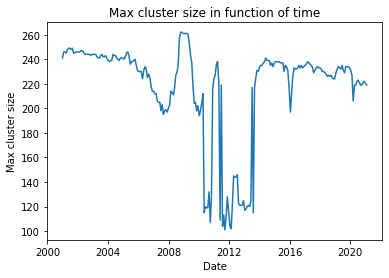

In [11]:
plt.title("Max cluster size in function of time")
plt.xlabel("Date")
plt.ylabel("Max cluster size")
plt.plot(dates, max_cluster_size)
plt.show()

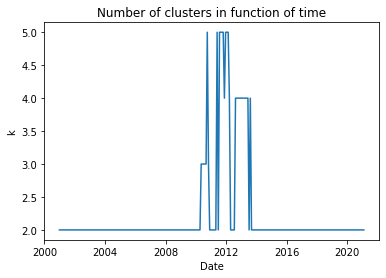

In [12]:
plt.title("Number of clusters in function of time")
plt.xlabel("Date")
plt.ylabel("k")
plt.plot(dates, k_values)
plt.show()